## Defaults on payments

### classification model which will predict if the customer is good or bad according to their payment of loan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
Bankdata1= pd.read_csv("Bankdata.csv")
Bankdata1.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [13]:
Bankdata1.shape

(5000, 23)

In [14]:
Bankdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Customer_ID                    5000 non-null int64
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job             

In [18]:
Bankdata1.iloc[0:5,1:23]

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [20]:
Bankdata1.Default_On_Payment.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [21]:
X_features = list( Bankdata1.columns )
X_features.remove( 'Default_On_Payment' )
X_features

['Customer_ID',
 'Status_Checking_Acc',
 'Duration_in_Months',
 'Credit_History',
 'Purposre_Credit_Taken',
 'Credit_Amount',
 'Savings_Acc',
 'Years_At_Present_Employment',
 'Inst_Rt_Income',
 'Marital_Status_Gender',
 'Other_Debtors_Guarantors',
 'Current_Address_Yrs',
 'Property',
 'Age',
 'Other_Inst_Plans ',
 'Housing',
 'Num_CC',
 'Job',
 'Dependents',
 'Telephone',
 'Foreign_Worker',
 'Count']

In [22]:
encoded_Bank_data = pd.get_dummies( Bankdata1[X_features],drop_first = True )

In [23]:
list(encoded_Bank_data)

['Customer_ID',
 'Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Current_Address_Yrs',
 'Age',
 'Num_CC',
 'Dependents',
 'Count',
 'Status_Checking_Acc_A12',
 'Status_Checking_Acc_A13',
 'Status_Checking_Acc_A14',
 'Credit_History_A31',
 'Credit_History_A32',
 'Credit_History_A33',
 'Credit_History_A34',
 'Purposre_Credit_Taken_A41',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A42',
 'Purposre_Credit_Taken_A43',
 'Purposre_Credit_Taken_A44',
 'Purposre_Credit_Taken_A45',
 'Purposre_Credit_Taken_A46',
 'Purposre_Credit_Taken_A48',
 'Purposre_Credit_Taken_A49',
 'Savings_Acc_A62',
 'Savings_Acc_A63',
 'Savings_Acc_A64',
 'Savings_Acc_A65',
 'Years_At_Present_Employment_A72',
 'Years_At_Present_Employment_A73',
 'Years_At_Present_Employment_A74',
 'Years_At_Present_Employment_A75',
 'Marital_Status_Gender_A92',
 'Marital_Status_Gender_A93',
 'Marital_Status_Gender_A94',
 'Other_Debtors_Guarantors_A102',
 'Other_Debtors_Guarantors_A103',
 'Property_A122',
 'Propert

In [25]:
encoded_Bank_data[['Savings_Acc_A62',
 'Savings_Acc_A63',
 'Savings_Acc_A64',
 'Savings_Acc_A65']].head(5)

,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [27]:
import statsmodels.api as sm
Y = Bankdata1.Default_On_Payment
X = sm.add_constant(encoded_Bank_data)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 58)

In [29]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.445935
         Iterations 7


In [30]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                  Pseudo R-squared:     0.269      
Dependent Variable:     Default_On_Payment     AIC:                  3221.5476  
Date:                   2020-08-27 15:45       BIC:                  3529.5735  
No. Observations:       3500                   Log-Likelihood:       -1560.8    
Df Model:               49                     LL-Null:              -2136.3    
Df Residuals:           3450                   LLR p-value:          6.6046e-209
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Customer_ID                      0.0000   0.0000   0.4782 0.6325 -0.0000  0.0001
Duration_in_Months               0.0277   0.0050   5.5328 0.0000  0.0179  0.0375
Credit_Amount                    0.0001   0.0000   5.4717 0.0000  0.0001  0.0002
Inst_Rt_Income                   0.3545   0.0470   7.5344 0.0000  0.2623  0.4467
Current_Address_Yrs             -0.0157   0.0465  -0.3376 0.7357 -0.1069  0.0755
Age                             -0.0099   0.0049  -2.0198 0.0434 -0.0195 -0.0003
Num_CC                           0.1871   0.0999   1.8730 0.0611 -0.0087  0.3828
Dependents                       0.2433   0.1353   1.7992 0.0720 -0.0217  0.5084
Count                           -1.2954   3.2026  -0.4045 0.6858 -7.5724  4.9815
Status_Checking_Acc_A12         -0.3723   0.1181  -3.1516 0.0016 -0.6038 -0.1408
Status_Checking_Acc_A13         -1.0487   0.2020  -5.1923 0.0000 -1.4445 -0.6528
Status_Checking_Acc_A14         -1.7515   0.1237 -14.1626 0.0000 -1.9939 -1.5091
Credit_History_A31               0.1709   0.2850   0.5994 0.5489 -0.3878  0.7295
Credit_History_A32              -0.4685   0.2225  -2.1060 0.0352 -0.9046 -0.0325
Credit_History_A33              -0.8639   0.2517  -3.4328 0.0006 -1.3572 -0.3707
Credit_History_A34              -1.1940   0.2268  -5.2649 0.0000 -1.6385 -0.7495
Purposre_Credit_Taken_A41       -1.8254   0.2009  -9.0857 0.0000 -2.2192 -1.4317
Purposre_Credit_Taken_A410      -1.3559   0.4184  -3.2409 0.0012 -2.1760 -0.5359
Purposre_Credit_Taken_A42       -0.7410   0.1401  -5.2907 0.0000 -1.0155 -0.4665
Purposre_Credit_Taken_A43       -0.8675   0.1317  -6.5845 0.0000 -1.1257 -0.6093
Purposre_Credit_Taken_A44       -0.4812   0.4162  -1.1562 0.2476 -1.2969  0.3345
Purposre_Credit_Taken_A45       -0.1214   0.3019  -0.4022 0.6875 -0.7132  0.4704
Purposre_Credit_Taken_A46        0.0629   0.2067   0.3042 0.7610 -0.3423  0.4681
Purposre_Credit_Taken_A48       -1.6153   0.5548  -2.9118 0.0036 -2.7026 -0.5280
Purposre_Credit_Taken_A49       -0.6584   0.1806  -3.6456 0.0003 -1.0124 -0.3044
Savings_Acc_A62                 -0.3684   0.1547  -2.3809 0.0173 -0.6717 -0.0651
Savings_Acc_A63                 -0.1684   0.2087  -0.8070 0.4196 -0.5775  0.2406
Savings_Acc_A64                 -1.4082   0.2950  -4.7740 0.0000 -1.9863 -0.8301
Savings_Acc_A65                 -0.6761   0.1365  -4.9522 0.0000 -0.9437 -0.4085
Years_At_Present_Employment_A72 -0.2684   0.2311  -1.1616 0.2454 -0.7212  0.1845
Years_At_Present_Employment_A73 -0.2961   0.2210  -1.3399 0.1803 -0.7294  0.1371
Years_At_Present_Employment_A74 -1.1697   0.2413  -4.8482 0.0000 -1.6426 -0.6968
Years_At_Present_Employment_A75 -0.4952   0.2220  -2.2307 0.0257 -0.9303 -0.0601
Marital_Status_Gender_A92       -0.0529   0.2051  -0.2580 0.7964 -0.4550  0.3491
Marital_Status_Gender_A93       -0.6660   0.2022  -3.2944 0.0010 -1.0622 -0.2698
Marital_Status_Gender_A94       -0.2095   0.2412  -0.8685 0.3851 -0.6822  0.2633
Other_Debtors_G

In [31]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [32]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['Duration_in_Months',
 'Credit_Amount',
 'Inst_Rt_Income',
 'Age',
 'Status_Checking_Acc_A12',
 'Status_Checking_Acc_A13',
 'Status_Checking_Acc_A14',
 'Credit_History_A32',
 'Credit_History_A33',
 'Credit_History_A34',
 'Purposre_Credit_Taken_A41',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A42',
 'Purposre_Credit_Taken_A43',
 'Purposre_Credit_Taken_A48',
 'Purposre_Credit_Taken_A49',
 'Savings_Acc_A62',
 'Savings_Acc_A64',
 'Savings_Acc_A65',
 'Years_At_Present_Employment_A74',
 'Years_At_Present_Employment_A75',
 'Marital_Status_Gender_A93',
 'Other_Debtors_Guarantors_A102',
 'Other_Debtors_Guarantors_A103',
 'Property_A122',
 'Property_A123',
 'Property_A124',
 'Other_Inst_Plans _A143',
 'Housing_A152',
 'Housing_A153',
 'Telephone_A192',
 'Foreign_Worker_A202']

In [33]:
final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.448229
         Iterations 7


In [34]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                  Logit                  Pseudo R-squared:     0.266      
Dependent Variable:     Default_On_Payment     AIC:                  3203.6003  
Date:                   2020-08-27 15:49       BIC:                  3406.8974  
No. Observations:       3500                   Log-Likelihood:       -1568.8    
Df Model:               32                     LL-Null:              -2136.3    
Df Residuals:           3467                   LLR p-value:          5.3805e-218
Converged:              1.0000                 Scale:                1.0000     
No. Iterations:         7.0000                                                  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.9814   0.2952   3.3244 0.0009  0.4028  1.5600
Duration_in_Months               0.0269   0.0049   5.5005 0.0000  0.0173  0.0365
Credit_Amount                    0.0001   0.0000   5.6447 0.0000  0.0001  0.0002
Inst_Rt_Income                   0.3415   0.0457   7.4762 0.0000  0.2520  0.4311
Age                             -0.0087   0.0047  -1.8498 0.0643 -0.0178  0.0005
Status_Checking_Acc_A12         -0.4123   0.1154  -3.5747 0.0004 -0.6384 -0.1863
Status_Checking_Acc_A13         -1.1080   0.1969  -5.6271 0.0000 -1.4939 -0.7221
Status_Checking_Acc_A14         -1.7632   0.1198 -14.7201 0.0000 -1.9980 -1.5285
Credit_History_A32              -0.5965   0.1533  -3.8921 0.0001 -0.8968 -0.2961
Credit_History_A33              -0.8677   0.2047  -4.2384 0.0000 -1.2690 -0.4665
Credit_History_A34              -1.1808   0.1702  -6.9369 0.0000 -1.5145 -0.8472
Purposre_Credit_Taken_A41       -1.7896   0.1917  -9.3376 0.0000 -2.1652 -1.4139
Purposre_Credit_Taken_A410      -1.3937   0.4080  -3.4160 0.0006 -2.1934 -0.5941
Purposre_Credit_Taken_A42       -0.7281   0.1300  -5.6024 0.0000 -0.9828 -0.4734
Purposre_Credit_Taken_A43       -0.8763   0.1219  -7.1874 0.0000 -1.1153 -0.6373
Purposre_Credit_Taken_A48       -1.6498   0.5519  -2.9891 0.0028 -2.7315 -0.5680
Purposre_Credit_Taken_A49       -0.6372   0.1715  -3.7146 0.0002 -0.9734 -0.3010
Savings_Acc_A62                 -0.3280   0.1515  -2.1644 0.0304 -0.6250 -0.0310
Savings_Acc_A64                 -1.3446   0.2887  -4.6579 0.0000 -1.9104 -0.7788
Savings_Acc_A65                 -0.6659   0.1337  -4.9810 0.0000 -0.9279 -0.4039
Years_At_Present_Employment_A74 -0.8677   0.1362  -6.3717 0.0000 -1.1346 -0.6008
Years_At_Present_Employment_A75 -0.1969   0.1198  -1.6433 0.1003 -0.4317  0.0379
Marital_Status_Gender_A93       -0.5329   0.0975  -5.4644 0.0000 -0.7241 -0.3418
Other_Debtors_Guarantors_A102    0.5632   0.2208   2.5511 0.0107  0.1305  0.9958
Other_Debtors_Guarantors_A103   -1.0320   0.2300  -4.4866 0.0000 -1.4828 -0.5812
Property_A122                    0.3770   0.1329   2.8363 0.0046  0.1165  0.6375
Property_A123                    0.2778   0.1228   2.2626 0.0237  0.0372  0.5184
Property_A124                    0.6755   0.2301   2.9358 0.0033  0.2245  1.1266
Other_Inst_Plans _A143          -0.6545   0.1136  -5.7612 0.0000 -0.8772 -0.4319
Housing_A152                    -0.5872   0.1196  -4.9083 0.0000 -0.8217 -0.3527
Housing_A153                    -0.6885   0.2546  -2.7038 0.0069 -1.1875 -0.1894
Telephone_A192                  -0.2939   0.1006  -2.9207 0.0035 -0.4911 -0.0967
Foreign_Worker_A202             -1.3883   0.3350  -4.1439 0.0000 -2.0449 -0.7317
================================================================================

"""

In [35]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } )

In [36]:
y_pred_df.sample(10, random_state = 58)

,actual,predicted_prob
3826,1,0.589565
1804,0,0.518668
713,0,0.212175
93,0,0.367868
3195,1,0.224085
4279,0,0.144247
3442,0,0.179565
37,1,0.412062
2941,0,0.035007
3723,0,0.267545


In [38]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state =58 )

,actual,predicted_prob,predicted
3826,1,0.589565,1
1804,0,0.518668,1
713,0,0.212175,0
93,0,0.367868,0
3195,1,0.224085,0
4279,0,0.144247,0
3442,0,0.179565,0
37,1,0.412062,0
2941,0,0.035007,0
3723,0,0.267545,0


In [46]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [54]:
def draw_cm( actual, predicted ):
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Bad cust", "Good cust"] ,
    yticklabels = ["Bad cust", "Good cust"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

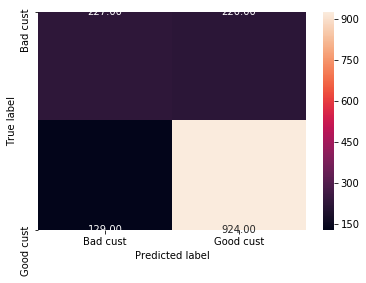

In [55]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [56]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1053
           1       0.64      0.51      0.57       447

    accuracy                           0.77      1500
   macro avg       0.72      0.69      0.70      1500
weighted avg       0.76      0.77      0.76      1500



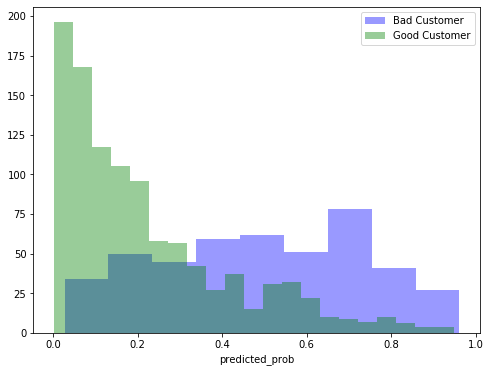

In [57]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Bad Customer' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Good Customer' )
plt.legend()
plt.show()

In [58]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

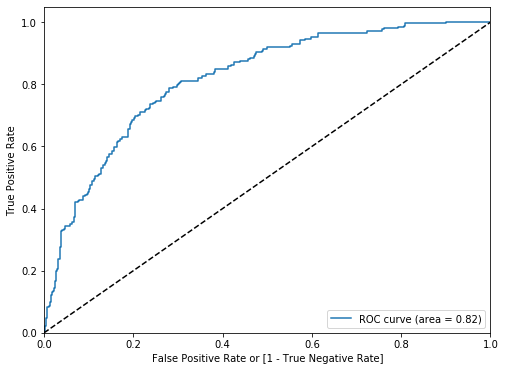

In [59]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [60]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.82

In [61]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
351,0.787472,0.279202,0.279019,0.508270
352,0.787472,0.280152,0.278292,0.507320
373,0.812081,0.306743,0.257454,0.505338
353,0.787472,0.283001,0.276302,0.504471
374,0.812081,0.307692,0.255668,0.504388


In [62]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.27 else 0)

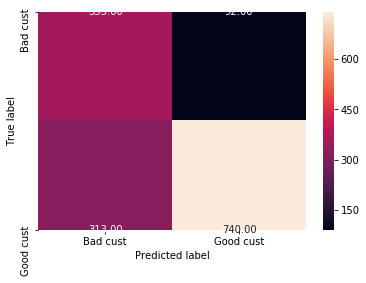

In [63]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_new)

In [64]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1053
           1       0.53      0.79      0.64       447

    accuracy                           0.73      1500
   macro avg       0.71      0.75      0.71      1500
weighted avg       0.78      0.73      0.74      1500



In [65]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [66]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [67]:
idx = 0
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [68]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
5,0.15,717.0
6,0.16,723.0
4,0.14,730.0
2,0.12,734.0
0,0.10,736.0


In [69]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.15 else 0)

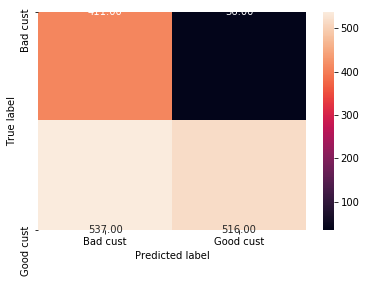

In [70]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_using_cost )